### Basic NLP Project

Importing all the necessary libraries

In [32]:
import sys
import nltk
#nltk.download
import pandas as pd
import string
import tkinter as tk

from nltk.corpus import stopwords
stop_words=stopwords.words('english')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [5]:
ps=PorterStemmer()
cv=CountVectorizer()


 
Steps in text processing & classification:
------------------------------------------
1.split the paragraph into sentences

2.split words from sentences

3.remove punctution

4.convert all words in lower case

5.remove stop words

6.stemming

7.lemmatizing

8.extract features using 
Bags of words(CountVectorizer or tfidf)
Word embedding(doc2vec) 

9.use naive bayes or logistic regression to train the model

10.make prediction/classifiy text. 

In [62]:
# Used for Cleaning the text
def clean_text(msg):
    '''
    1:remove punctuation
    2:remove stopwords
    3:steming
    '''
    new_msg=[w for w in msg if w not in string.punctuation]
    new_msg2=''.join(new_msg)
    tmp_list=[]
    for ww in new_msg2.split():        
        if(ww.lower() not in stop_words):
            tmp_list.append(ww.lower())
    new_msg3=' '.join(tmp_list)
    new_msg4=[ps.stem(w) for w in new_msg3.split()]
    return ' '.join(new_msg4)
example='@hash The New .; snake , swimming ,use case'
clean_text(example)

'hash new snake swim use case'

#### Reading the DataSet

In [9]:
df = pd.read_csv('Restaurant_Reviews.txt',sep='\t' )
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<AxesSubplot:>

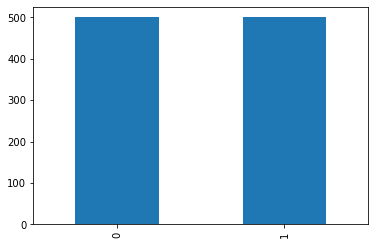

In [63]:
df.Liked.value_counts().plot(kind='bar')

In [17]:
df['Review']=df.Review.apply(clean_text)
sparse_mtr=cv.fit_transform(df.Review)
X=sparse_mtr.toarray()
y=df.Liked

## Checking Different Models

In [28]:
mnb=MultinomialNB()
mnb.fit(X,y)
print(cross_val_score(gnb,X,y,cv=10).mean())

0.775


In [34]:
gnb=GaussianNB()
gnb.fit(X,y)
print(cross_val_score(gnb,X,y,cv=10).mean())

0.6880000000000001


In [36]:
lr=LogisticRegression()
lr.fit(X,y)
print(cross_val_score(lr,X,y,cv=10).mean())

0.778


### Selecting Logistic regression

In [61]:
test=input('enter msg:')
test=clean_text(test)
test_X=cv.transform([test])
pred=lr.predict(test_X.toarray())
x=lambda output : 'Good Review' if output==1 else 'Bad Review'  
print(x(pred))

enter msg: loved # the food @


Good Review


In [67]:
! python Restaurant_Reviews.py